In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("uber.csv")

In [4]:
data.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df = data.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


## Preprocessing the dataset

In [7]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Unnamed: 0         200000 non-null  int64              
 1   key                200000 non-null  object             
 2   fare_amount        200000 non-null  float64            
 3   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 4   pickup_longitude   200000 non-null  float64            
 5   pickup_latitude    200000 non-null  float64            
 6   dropoff_longitude  199999 non-null  float64            
 7   dropoff_latitude   199999 non-null  float64            
 8   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2), object(1)
memory usage: 13.7+ MB


In [9]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [10]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

### Correlation Matrix

In [11]:
df.corr()

ValueError: could not convert string to float: '2015-05-07 19:52:06.0000003'

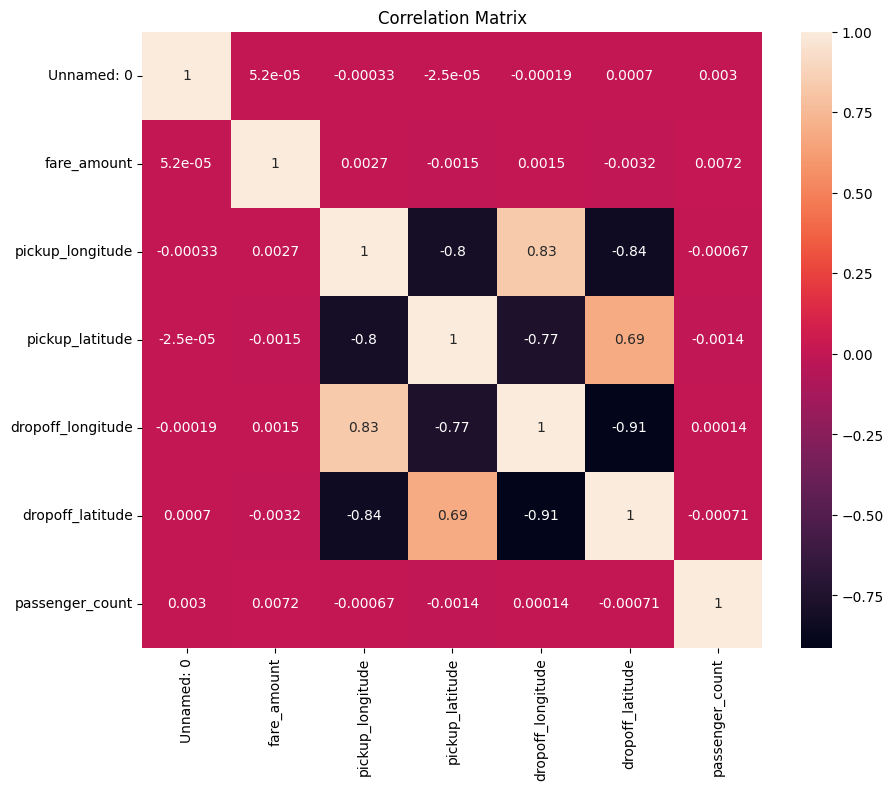

In [23]:
corr = df.corr(numeric_only = True)
plt.figure(figsize = (10,8))
sns.heatmap(corr, annot = True)
plt.title('Correlation Matrix')
plt.show()

In [13]:
df.dropna(inplace=True)

## Identifying and removing outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x27b5156b310>,
 'caps': [<matplotlib.lines.Line2D at 0x27b5156b8b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27b5156afb0>],
 'medians': [<matplotlib.lines.Line2D at 0x27b5156beb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27b515981f0>],
 'means': []}

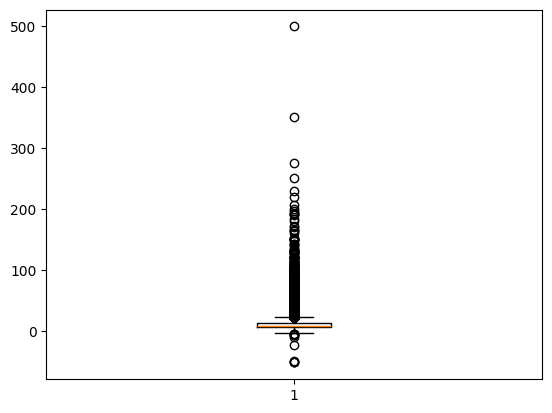

In [14]:
plt.boxplot(df['fare_amount'])

In [20]:
#Percentile Method
q_low = df['fare_amount'].quantile(0.01)
q_hi = df['fare_amount'].quantile(0.99)

df = df[(df['fare_amount'] > q_low) & (df['fare_amount'] < q_hi)]

{'whiskers': [<matplotlib.lines.Line2D at 0x27b550aa5f0>,
 'caps': [<matplotlib.lines.Line2D at 0x27b550aabf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x27b550aa410>],
 'medians': [<matplotlib.lines.Line2D at 0x27b550ab1f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27b550ab4f0>],
 'means': []}

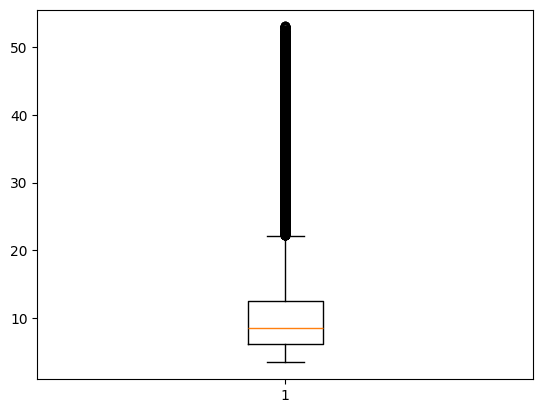

In [17]:
plt.boxplot(df['fare_amount'])

## Linear and RandomForest

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

ModuleNotFoundError: No module named 'sklearn'

In [29]:
pip install scikit-learn

     ---------------------------------------- 8.9/8.9 MB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 41.3/41.3 MB 3.1 MB/s eta 0:00:00
     -------------------------------------- 308.4/308.4 kB 3.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
pip install --upgrade pip

     ---------------------------------------- 1.8/1.8 MB 3.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1
Note: you may need to restart the kernel to use updated packages.


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [33]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [36]:
X = df[[ 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = df['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [38]:
y_pred_lr

array([10.12962641, 10.12970028, 10.12975155, ..., 10.12949645,
       10.27142394, 10.12985436], shape=(36601,))

In [39]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [40]:
y_pred_rf

array([6.32  , 9.555 , 9.412 , ..., 5.163 , 8.316 , 9.0247],
      shape=(36601,))

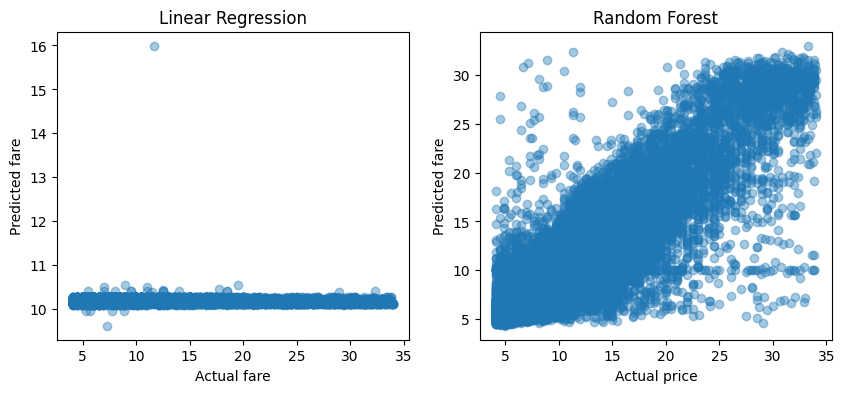

In [43]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.scatter(y_test, y_pred_lr, alpha = 0.4)
plt.xlabel('Actual fare')
plt.ylabel('Predicted fare')
plt.title('Linear Regression')

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_rf, alpha = 0.4)
plt.xlabel('Actual price')
plt.ylabel('Predicted fare')
plt.title('Random Forest')

plt.show()

In [44]:
def evaluate_model(y_true, y_pred, name):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    print(f"{name} : -> R_square : {r2}, Root mean square Error : {rmse}, Absolute Error : {mae}" )

In [45]:
evaluate_model(y_test, y_pred_lr, 'Linear Regression')
evaluate_model(y_test, y_pred_rf, 'Random Forest Regression')

Linear Regression : -> R_square : 0.00013724874928511266, Root mean square Error : 5.625307253868802, Absolute Error : 4.15416274748047
Random Forest Regression : -> R_square : 0.7680824610842556, Root mean square Error : 2.709211127063371, Absolute Error : 1.7972425720512069
